# **Online Shopping Intention Analysis**

Nowadays, online shopping is one of the major growing business. From mobile phone to groccery to cloths mosth of the things are bought in online. So, understanding the products which are in demand and which are not is an important task for e-commerce websites. 

In [21]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import scikitplot as skplt

In [6]:
#Read the dataset as dataframe
df = pd.read_csv('../input/online-shoppers-intention/online_shoppers_intention.csv')

In [7]:
#Display fist five rows of dataframe
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
#Display last five rows of dataframe
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [9]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
#Missing values
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [11]:
#Fill Missing Values with zero
df.fillna(0, inplace = True)

From all the attributes by using only ProductRelated_Duration and BounceRates we can easily divide the customers in segments and their tendency to buy the product.

In [12]:
#Filling missing data
x = df.iloc[:, 5:7].values

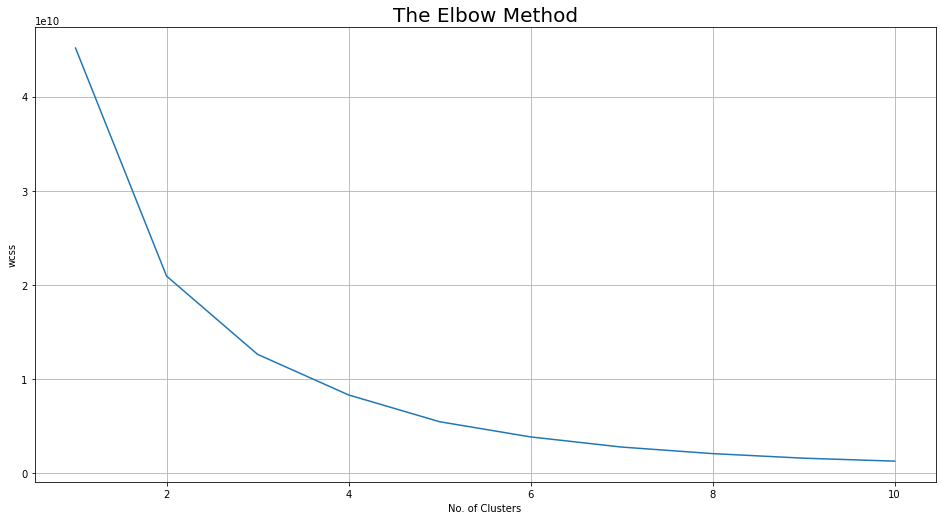

In [13]:
#Calculating optimal number of clusters using K-Means algorithm
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, algorithm = 'full', tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

From the above graph we can see that the maximum curvature at 2. Therfore optimal number of clusters is 2.

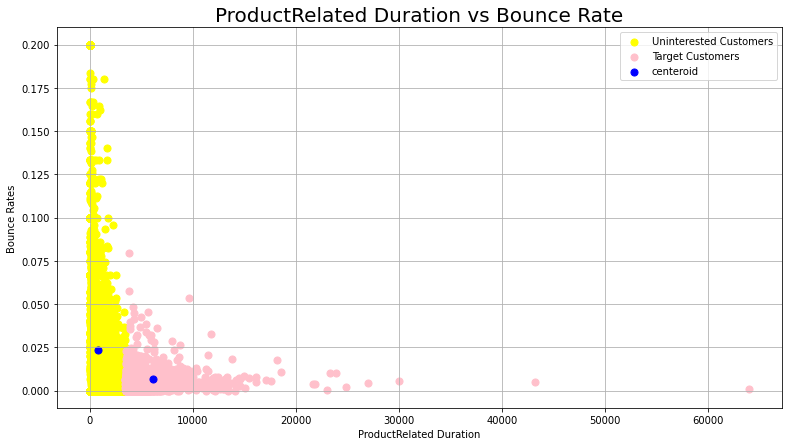

In [15]:
#Custering and Visualization
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
y =  km.fit_predict(x)
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

# **Conclusion**

Looking at this K Means grouping plot, we can say with certainty that customers who spent more time on a product-related website are very less likely to leave the website after viewing a single page.

In [17]:
#Encode the revenue attribute
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_target = le.fit_transform(df['Revenue'])
print(y_target)

[0 0 0 ... 0 0 0]


In [18]:
#Calculate adjusted_rand_score which is used to calculate  similarity between two attributes
from sklearn import metrics
score = metrics.adjusted_rand_score(y_target, y)
print(score)

0.08359442469281096


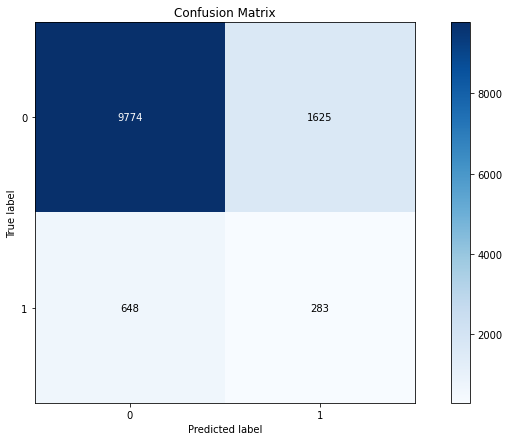

In [24]:
#Plot confusion matrix
plt1 = skplt.metrics.plot_confusion_matrix(y, y_target, normalize = False)

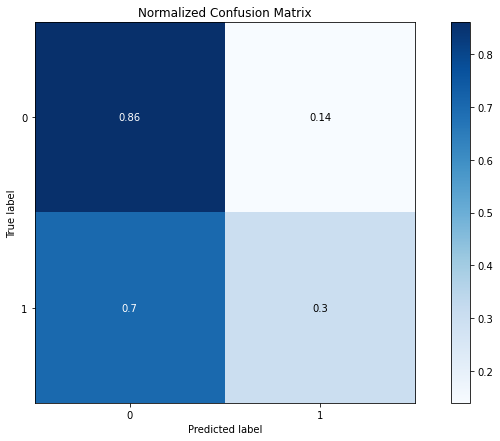

In [25]:
#Plot normalized confusion matrix
plt2 = skplt.metrics.plot_confusion_matrix(y, y_target, normalize = True)

# **Summary**
In this analysis our main target is to cluster all the customers who are interested to buy product but if we cluster some persons  who aren't interested as interested  buyer, that's doesn't create a big problem but if we miss some buyers who are interested to buy as non-interested buyer that's bigger problem and in this analysis we can see that only 7% buyers are  miissed who are interested to buy something as non-interested buyer. That means the model is working pretty good.